# Détection des croisements de potentiel - Potentiels évités

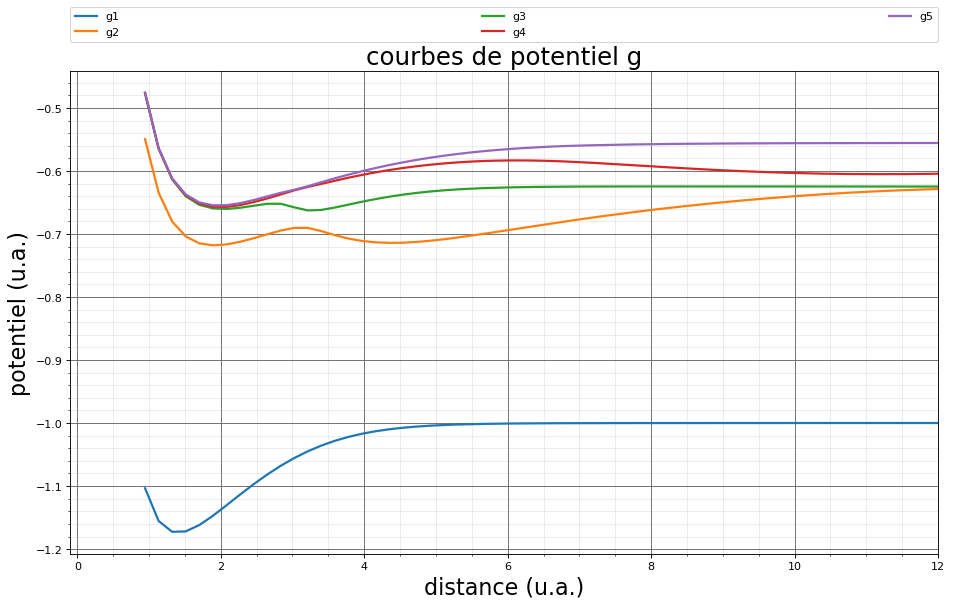

In [2]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from textwrap import wrap
#############################################################################
# ouverture des fichiers et lecture des données
with open ("pec_sigmag.txt", "r") as fichierg: # ouverture du fichier pec_sigmag.txt en mode lecture
    fichierg = open("pec_sigmag.txt", "r")
echelle=1/0.529177
data_g = np.loadtxt(fichierg)
xg_read = data_g[:,0]*echelle
with open ("pec_sigmau.txt", "r") as fichieru: # ouverture du fichier pec_sigmau.txt en mode lecture
    fichieru = open("pec_sigmau.txt", "r")
data_u = np.loadtxt(fichieru)
xu_read = data_u[:,0]*echelle
#########################################################################
# création des fonctions Vgi(x) et Vui(x) qui sont inexées et interpolent les potentiels Vgi et Vui
g1=interp1d(xg_read, data_g[:,1], kind='cubic')
g2=interp1d(xg_read, data_g[:,2], kind='cubic')
g3=interp1d(xg_read, data_g[:,3], kind='cubic')
g4=interp1d(xg_read, data_g[:,4], kind='cubic')
g5=interp1d(xg_read, data_g[:,5], kind='cubic')
Vg = [g1,g2,g3,g4,g5]

g6=interp1d(xu_read, data_u[:,1], kind='cubic')
g7=interp1d(xu_read, data_u[:,2], kind='cubic')
g8=interp1d(xu_read, data_u[:,3], kind='cubic')
g9=interp1d(xu_read, data_u[:,4], kind='cubic')
g10=interp1d(xu_read, data_u[:,5], kind='cubic')
Vu = [g6,g7,g8,g9,g10]
#############################################################################
# impressions et plot
figure(figsize=(14,8), dpi=80)
rcParams['axes.labelsize'] = 20
# Lignes d'unités principales
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Lignes de subdivision
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
xlabel("distance (u.a.)")
ylabel("potentiel (u.a.)")
plt.xlim(-0.1,12)
for ip in range(1,6):
    plt.plot(xg_read, data_g[:,ip],linewidth=2.0, label="g%d"%(ip,))
    #plt.plot(xu_read, data_u[:,ip],linewidth=0.5, label="u%d"%(ip,))
plt.title ("courbes de potentiel g", fontsize=22)
plt.legend(bbox_to_anchor=(0., 1.06, 1., .106), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()



Les encarts suivants déterminent les croisements évités en effectuant une trajectoire sur l'une des courbes de potentiel et en estimant le changement de signe de la différence d'évergie entre ce potentiel et une autre courbe de type g.

La formule de Landau-Zener s'écrit:
$$exp~{\left[{-\frac{\pi}{2}}\cdot\sqrt{~\frac{ \left|~\Delta V_{ce}~\right|^3}{ \left|~3\frac{d^2\Delta V_{ce}}{dt^2}~\right|}}\right]}$$

où $\Delta V_{ce}$ désigne la différence entre les potentiels des deux courbes au droit du croisement évité.

Pour être en mesure de calculer la probabilité de Landau-Zener, il faut calculer la dérivée seconde de la différence entre les potentiels des courbes au droit du croisement évité.

Cette dérivée seconde est calculée par la formule aux différences finies:
$$f"(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$


## Données sur les limites des potentiels
Attention lorsque l'énergie de départ est trop forte il y a dépassée de la barrière de potentiel à l'arrivée. Les valeurs maxi de ces potentiels sont données pour g2 à g5 dans la liste ci-dessous et valent pour l'indice i=0 de data_ g [i,j].

-0.5493228411 -0.4766498111 -0.4761058109 -0.4754815269

Ces maxima ont lieu au temps 0.9448634388871776 a.u.

Au temps maxi (temps ~100 u.a.), les potentiels valent: -0.6249022225 -0.6248999031 -0.5554384505 -0.5554229812

Ceci correspond à des vitesses maxi à l'infini de : 0.01283203, 0.01797178, 0.01314679, 0.01319714, respectivement. En utilisant une vitesse de 0.01 on est donc assuré de ne jamais dépasser la barrière de potentiel.

Il faut donc un temps de l'ordre de 20 000 a.u. pour faire l'aller-retour.

In [63]:
m=918
xg_read = data_g[:,0]*echelle
print(max(data_g[:,2]), max(data_g[:,3]),max(data_g[:,4]),max(data_g[:,5]))


for i in range(len(data_g[:,4])):
    if data_g[i,4] ==max(data_g[:,4]):
     
        Index = i
        print(i)
        break

limites_basses=[data_g[0,2],data_g[0,3],data_g[0,4],data_g[0,5]]
limites_hautes=[data_g[487,2],data_g[487,3],data_g[487,4],data_g[487,5]] 

#Delta_E=limites_basses-limites_hautes

Delta_E = [limites_basses - limites_hautes for limites_basses, limites_hautes in zip(limites_basses, limites_hautes)]

v_maxi=zeros(4)
for i in range(4):
        v_maxi[i]=sqrt(2*Delta_E[i]/m)

print(limites_basses)
print(limites_hautes)
print(xg_read[0])
print(Delta_E)
print(v_maxi)

-0.5493228411 -0.4766498111 -0.4761058109 -0.4754815269
0
[-0.5493228411, -0.4766498111, -0.4761058109, -0.4754815269]
[-0.6249022225, -0.6248999031, -0.5554384505, -0.5554229812]
0.9448634388871776
[0.07557938140000009, 0.148250092, 0.07933263959999998, 0.07994145429999999]
[0.01283203 0.01797178 0.01314679 0.01319714]


croisement évité à t= 6710.0  x= 4.898393878142165 dV= -0.07820683553948582 accélération 9.120951983056932e-06 Landau-Zener 0.0014051755189388804
croisement évité à t= 6802.4  x= 3.2043137680280895 dV= -0.027670493221544912 accélération -0.00011431058879282001 Landau-Zener 0.6767669046404976
croisement évité à t= 6943.828571428571  x= 0.947187932968957 dV= -0.07264209300180963 accélération 8.493193230470273e-06 Landau-Zener 0.0022594122549400167
croisement évité à t= 7083.685714285714  x= 3.2061353598237696 dV= -0.027671139992608507 accélération -0.00011906997904128533 Landau-Zener 0.682113485958863
croisement évité à t= 7174.5142857142855  x= 4.8974430038111905 dV= -0.07820681220780201 accélération 9.428955025050785e-06 Landau-Zener 0.0015656844684169733


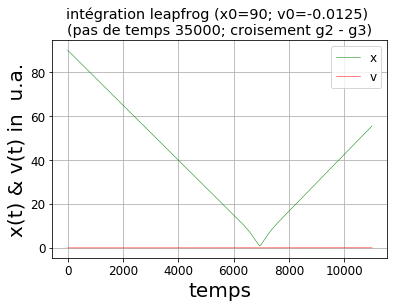

In [3]:
x0=90 # Les valeurs autorisées dépendent du potentiel
v0=-0.0125

###############################################################################
# masse à prendre en compte et index des fonctions de potentiel

m=918

Potentiel=g2
Potentiel1=g3

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 35000    
tps=11000
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.000001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)/m
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)/m
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)/m
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)/m          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] ,'dV=', dV[1], 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 
x,v = resoudre(x0,v0,Mm,Potentiel)
###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))


###############################################################################
show()


Test d'un dépassement des limites de distance (100 a.u.) du tableau de potentiel: cas $ x \to \infty$.

croisement évité à t= 78.20918  x= 4.924983304442493 dV= -0.07819786954579866 accélération 0.004963943777150773 Landau-Zener 0.7546705762185503
croisement évité à t= 81.99786  x= 3.257953617047561 dV= -0.028209791242141735 accélération -0.05140096291640522 Landau-Zener 0.9812256728197535
croisement évité à t= 87.9515  x= 0.9749370614235874 dV= -0.07226238418489428 accélération 0.007555335273166459 Landau-Zener 0.816543336088093
croisement évité à t= 92.0108  x= 3.2302839432452948 dV= -0.027800807525033777 accélération -0.11990444822148305 Landau-Zener 0.9879331430750354
croisement évité à t= 94.717  x= 4.988096450775585 dV= -0.07810480417708632 accélération 0.01033556706983791 Landau-Zener 0.8230657645726902


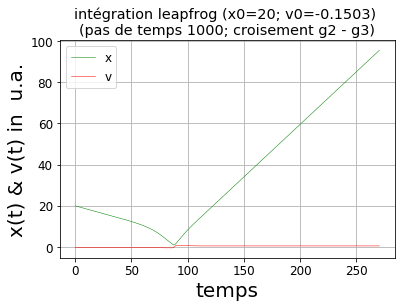

In [30]:
x0=20 
v0=-0.1503
Potentiel=g2
Potentiel1=g3

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 1000    
tps=270.62
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] ,'dV=', dV[1], 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 
x,v = resoudre(x0,v0,Mm,Potentiel)
###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))


###############################################################################
show()


In [71]:
x0=90 # Les valeurs autorisées dépendent du potentiel
v0=-0.005

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918


Potentiel=g2
Potentiel1=g4

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 100000    
tps=30000
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]
texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
print(texte1)
print(texte2)

###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)/m
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)/m
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)/m
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)/m          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
###############################################################################  
x,v = resoudre(x0,v0,Mm,Potentiel)


{'Potentiel', 'g2'}
{'g4', 'Potentiel1'}
croisement évité à t= 4350.6  x= 68.24675815765531 accélération -3.601984883561116e-13 Landau-Zener 0.0
croisement évité à t= 6512.7  x= 57.43611112735039 accélération 4.0460652116713907e-13 Landau-Zener 0.0
croisement évité à t= 15507.0  x= 12.34919796696702 accélération -1.090566092286278e-07 Landau-Zener 3.484561464236993e-05
croisement évité à t= 16349.4  x= 4.9347832338625865 accélération 5.137002805523931e-06 Landau-Zener 5.177906630915778e-08
croisement évité à t= 16510.2  x= 2.681281236375169 accélération -4.710763704349709e-06 Landau-Zener 0.0034601131911190723
croisement évité à t= 16640.7  x= 1.0726407526753952 accélération 6.265281093601773e-06 Landau-Zener 0.0010141498668725711
croisement évité à t= 16770.0  x= 2.681055504992163 accélération -4.860705922197254e-06 Landau-Zener 0.003778719059608118
croisement évité à t= 16928.4  x= 4.932669858509991 accélération 5.294657079011111e-06 Landau-Zener 6.659563174701327e-08
croisement évit

In [3]:
x0=90 
v0=-0.35
Potentiel=g2
Potentiel1=g5

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 20000    
tps=400
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]
texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
print(texte1)
print(texte2)

###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 
x,v = resoudre(x0,v0,Mm,Potentiel)


{'Potentiel', 'g2'}
{'Potentiel1', 'g5'}
croisement évité à t= 0.46  x= 89.83899194953098 accélération 3.4931977722827066e-07 Landau-Zener 6.246752738668606e-13
croisement évité à t= 1.22  x= 89.57297864858074 accélération -1.093616295758494e-06 Landau-Zener 1.2661440236399798e-07
croisement évité à t= 2.02  x= 89.29296464741765 accélération 4.7301872537236496e-07 Landau-Zener 3.2519073199677234e-11
croisement évité à t= 2.84  x= 89.00595029564518 accélération -7.979690463367176e-07 Landau-Zener 8.417605755801273e-09
croisement évité à t= 3.58  x= 88.7469373437318 accélération 2.831021511801625e-07 Landau-Zener 2.7751493011591564e-14
croisement évité à t= 4.16  x= 88.54392719202485 accélération -6.24443553427792e-08 Landau-Zener 1.362965593209842e-29
croisement évité à t= 4.58  x= 88.39691984058231 accélération 2.807945058495645e-08 Landau-Zener 8.997406922175918e-44
croisement évité à t= 128.98  x= 44.854718672333824 accélération -3.2795483910615097e-09 Landau-Zener 1.1443138509329442

croisement évité à t= 7884.0  x= 11.184234386468123 accélération -2.5312176359434367e-07 Landau-Zener 0.007080880223566047
croisement évité à t= 8437.5  x= 5.657147678978165 accélération 3.820013083565217e-07 Landau-Zener 2.0423830761029875e-06
croisement évité à t= 8547.0  x= 4.488254906801474 accélération -3.2403664895840947e-07 Landau-Zener 9.718033748982684e-07
croisement évité à t= 8610.0  x= 3.731171641301216 accélération 1.5974864104299912e-06 Landau-Zener 0.0017831255431854523
croisement évité à t= 8830.5  x= 1.163878538884146 accélération -1.060581481559667e-06 Landau-Zener 0.984116542931423
croisement évité à t= 9040.5  x= 3.7226259708389895 accélération 1.967322886453839e-06 Landau-Zener 0.00333455193491355
croisement évité à t= 9099.0  x= 4.47811652329892 accélération -3.7918188428038473e-07 Landau-Zener 2.7666704433128865e-06
croisement évité à t= 9201.0  x= 5.663343084908084 accélération 4.614664809364921e-07 Landau-Zener 6.655344481789646e-06
croisement évité à t= 9705.0

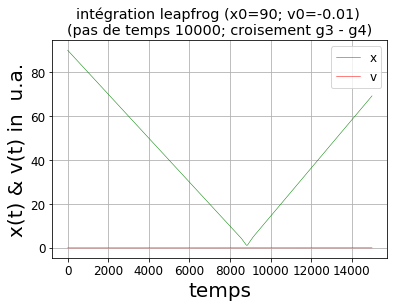

In [74]:
x0=90 # Les valeurs autorisées dépendent du potentiel
v0=-0.01

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918

Potentiel=g3

Potentiel1=g4
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=15000
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)/m
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)/m
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)/m
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)/m          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 


x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))


###############################################################################
show()



{'g4', 'Potentiel'}
{'g5', 'Potentiel1'}
croisement évité à t= 0.595  x= 89.82148213962108 accélération 3.1846390558165047e-07 Landau-Zener 0.9999003322305235
croisement évité à t= 1.4  x= 89.57995794955823 accélération -7.690693062956058e-07 Landau-Zener 0.9999363319216968
croisement évité à t= 2.38  x= 89.28592845981396 accélération 3.409581436259915e-07 Landau-Zener 0.9999034088079582
croisement évité à t= 3.29  x= 89.01290103556175 accélération -5.669622286908698e-07 Landau-Zener 0.999925544589629
croisement évité à t= 4.27  x= 88.71887145670478 accélération 1.336897879433506e-07 Landau-Zener 0.999845542933522
croisement évité à t= 4.62  x= 88.6138608813774 accélération -9.618453078135003e-08 Landau-Zener 0.9998179622132548
croisement évité à t= 48.65  x= 75.40347258379585 accélération 3.236672277787293e-09 Landau-Zener 0.9989616020857077
croisement évité à t= 133.84  x= 49.843625063060635 accélération -5.322658630165269e-09 Landau-Zener 0.9994777371926087
croisement évité à t= 250

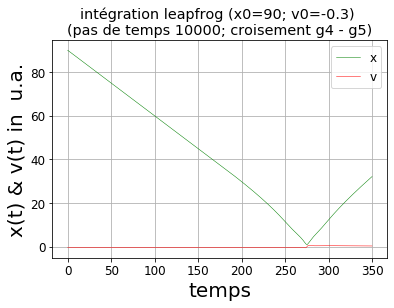

In [11]:
x0=90 
v0=-0.3
Potentiel=g4

Potentiel1=g5
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=350
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)

texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
print(texte1)
print(texte2)

###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 

x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))


###############################################################################
show()


croisement évité à t= 0.595  x= 89.82148213962108 accélération 3.1846390558165047e-07 Landau-Zener 0.9999003322305235
croisement évité à t= 1.4  x= 89.57995794955823 accélération -7.690693062956058e-07 Landau-Zener 0.9999363319216968
croisement évité à t= 2.38  x= 89.28592845981396 accélération 3.409581436259915e-07 Landau-Zener 0.9999034088079582
croisement évité à t= 3.29  x= 89.01290103556175 accélération -5.669622286908698e-07 Landau-Zener 0.999925544589629
croisement évité à t= 4.27  x= 88.71887145670478 accélération 1.336897879433506e-07 Landau-Zener 0.999845542933522
croisement évité à t= 4.62  x= 88.6138608813774 accélération -9.618453078135003e-08 Landau-Zener 0.9998179622132548
croisement évité à t= 48.65  x= 75.40347258379585 accélération 3.236672277787293e-09 Landau-Zener 0.9989616020857077
croisement évité à t= 133.84  x= 49.843625063060635 accélération -5.322658630165269e-09 Landau-Zener 0.9994777371926087
croisement évité à t= 250.635  x= 11.256239682401647 accélération 

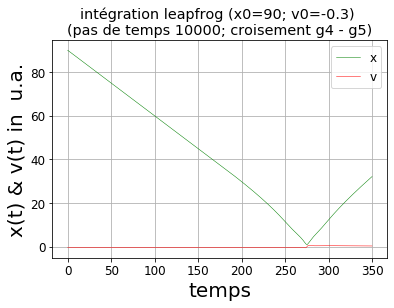

In [10]:
x0=90 
v0=-0.3
Potentiel=g4

Potentiel1=g5
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=350
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 


x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))



###############################################################################
show()

croisement évité à t= 0.105  x= 89.96849685005486 accélération -1.2518428075692675e-07 Landau-Zener 4.113717346577763e-21
croisement évité à t= 0.49  x= 89.85298530501626 accélération 2.06948494172546e-07 Landau-Zener 1.395830121988906e-16
croisement évité à t= 1.435  x= 89.56945699923006 accélération -7.887909883949375e-07 Landau-Zener 7.56489967833179e-09
croisement évité à t= 2.31  x= 89.30693083103364 accélération 3.60462809205018e-07 Landau-Zener 9.692724827432862e-13
croisement évité à t= 3.325  x= 89.00240052594508 accélération -5.730183034861083e-07 Landau-Zener 2.9626030586985164e-10
croisement évité à t= 4.095  x= 88.77137757202809 accélération 2.7284277423419143e-07 Landau-Zener 1.5543323830387393e-14
croisement évité à t= 294.28  x= 1.171382325624577 accélération -0.0009975038628506577 Landau-Zener 0.9990940275514496


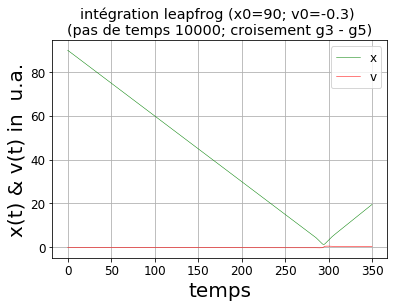

In [3]:
x0=90 
v0=-0.3
Potentiel=g3

Potentiel1=g5
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=350
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 


x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))

###############################################################################
show()

croisement évité à t= 0.595  x= 89.82148216000982 accélération -3.1846363374467304e-07 Landau-Zener 0.999900332187988
croisement évité à t= 1.4  x= 89.5799579408906 accélération 7.690702124188638e-07 Landau-Zener 0.9999363319592041
croisement évité à t= 2.38  x= 89.28592843959937 accélération -3.4095778117668827e-07 Landau-Zener 0.9999034087566189
croisement évité à t= 3.29  x= 89.01290108300098 accélération 5.669620474662183e-07 Landau-Zener 0.9999255445777371
croisement évité à t= 4.27  x= 88.71887159538696 accélération -1.3369033161730545e-07 Landau-Zener 0.9998455432475427
croisement évité à t= 4.62  x= 88.61386109304185 accélération 9.618462139367583e-08 Landau-Zener 0.9998179622989755
croisement évité à t= 48.65  x= 75.40352375771444 accélération -3.2358567668550398e-09 Landau-Zener 0.9989614713109188
croisement évité à t= 133.805  x= 49.853825919140036 accélération 5.337519051597439e-09 Landau-Zener 0.9994784645363393
croisement évité à t= 262.43  x= 11.252762168791612 accélérat

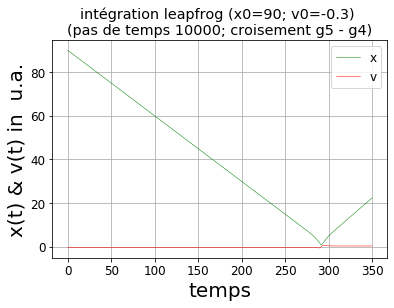

In [16]:
x0=90 
v0=-0.3
Potentiel=g5

Potentiel1=g4
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=350
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 


x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))

###############################################################################
show()